# ISCX score analysis


## Load data

In [ ]:
import zipfile
import os

def extract_zip_files(folder_path):
  for filename in os.listdir(folder_path):
    if filename.endswith(".zip"):
      filepath = os.path.join(folder_path, filename)
      try:
        with zipfile.ZipFile(filepath, 'r') as zip_ref:
          zip_ref.extractall(folder_path)
        print(f"Extracted {filename} successfully.")
      except zipfile.BadZipFile:
        print(f"Error: {filename} is not a valid zip file.")
      except Exception as e:
        print(f"An error occurred while extracting {filename}: {e}")

# Example usage (replace with your folder path)
extract_zip_files(".")


Extracted anoedge_g_ISCX_score.zip successfully.


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame without a header
df = pd.read_csv('./anoedge_g_ISCX_score.csv', header=None, sep=' ')

# Assign column names
df.columns = ['Prediction', 'Label']

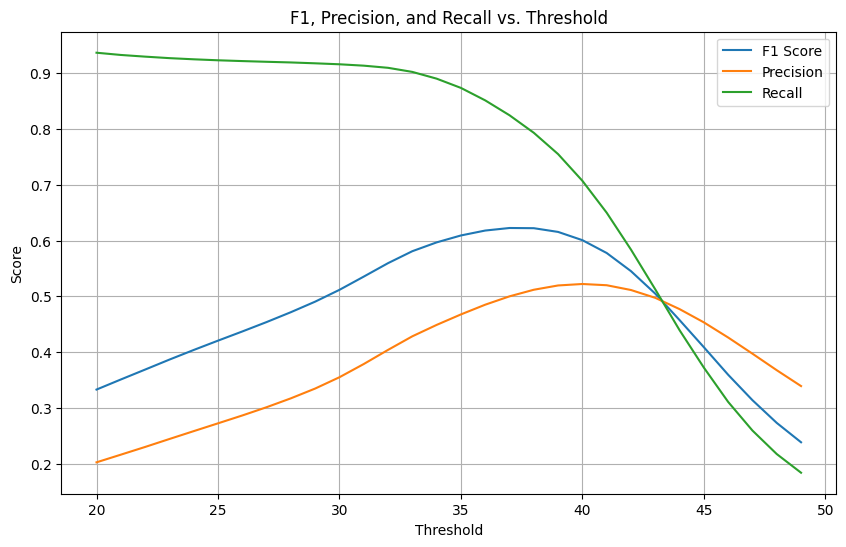

In [ ]:
# prompt: Iterate over 1 to 100 call the value threshold
# Create new data frame in every iteration like following
# if prediction value is greater than threshold assign 1
# otherwise zero
# after that calculate F1 score, precision , recall
# and plot them like the following
# multi LIne plot
# x : threshold value
# y_f1 :
# y_accurray :

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

results = []

for threshold in range(20, 50):
    # Create a new DataFrame for each threshold
    df_threshold = df.copy()
    df_threshold['Prediction_thresholded'] = (df_threshold['Prediction'] > threshold).astype(int)

    # Calculate metrics
    f1 = f1_score(df_threshold['Label'], df_threshold['Prediction_thresholded'])
    precision = precision_score(df_threshold['Label'], df_threshold['Prediction_thresholded'])
    recall = recall_score(df_threshold['Label'], df_threshold['Prediction_thresholded'])

    results.append([threshold, f1, precision, recall])

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(results, columns=['Threshold', 'F1', 'Precision', 'Recall'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['F1'], label='F1 Score')
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1, Precision, and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()